<a href="https://colab.research.google.com/github/MiltonPC-Fisica/Exp-Cuanticos-I-Grupo-4-/blob/main/Programa_optimizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from scipy.odr import ODR, Model, RealData
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from numpy import linalg, tan,sqrt, pi,cos,sin,exp
from numpy import linspace, array,zeros,arange,append,nan
import uncertainties as unc
from uncertainties import unumpy as unp
from matplotlib.font_manager import FontProperties

# Absorbancia vs $\lambda$

In [ ]:
def ajustar_gaussianas(data_file, rango_x, beta0, graficar=False):
    """Realiza el ajuste de dos gaussianas para un archivo de datos dado."""

    # Leer datos
    data = pd.read_csv(data_file, sep='\t', header=None)
    data.columns = ['longitud_onda', 'absorbancia']
    x = data['longitud_onda'].values[rango_x[0]:rango_x[1]]
    y = data['absorbancia'].values[rango_x[0]:rango_x[1]]
    errx = np.full_like(x, 0.1)
    erry = np.where(y <= 0.5, 0.002, np.where(y <= 1.0, 0.003, 0.006))

    # Normalizar la gaussiana
    min_abs = np.min(y)
    y = y + abs(min_abs)
    max_abs = np.max(y)
    y = y/max_abs

    # Definir modelo
    def dos_gaussianas(params, x):
        A1, mu1, sigma1, A2, mu2, sigma2 = params
        gauss1 = A1 * np.exp(-((x - mu1) / sigma1)**2 / 2)
        gauss2 = A2 * np.exp(-((x - mu2) / sigma2)**2 / 2)
        return gauss1 + gauss2

    # Configurar y ejecutar ODR
    data = RealData(x, y, sx=errx, sy=erry)
    model = Model(dos_gaussianas)
    odr_instance = ODR(data, model, beta0=beta0)
    output = odr_instance.run()

    # Resultados
    params = output.beta
    param_errors = output.sd_beta

    print("\nParámetros ajustados y sus incertezas:")
    param_names = ['A1', 'mu1', 'sigma1', 'A2', 'mu2', 'sigma2']
    for name, value, error in zip(param_names, params, param_errors):
        print(f"{name}: {value:.4f} ± {error:.4f}")

    if graficar==True:
    # Graficar resultados
      x_fit = np.linspace(min(x), max(x), 100)
      y_fit = dos_gaussianas(params, x_fit)
      gauss1_fit = params[0] * np.exp(-((x_fit - params[1]) / params[2])**2 / 2)
      gauss2_fit = params[3] * np.exp(-((x_fit - params[4]) / params[5])**2 / 2)

      plt.figure(figsize=(10, 6))
      plt.errorbar(x, y, xerr=errx, yerr=erry,
                 fmt='o', capsize=5, label='Datos experimentales')
      plt.plot(x_fit, gauss1_fit, 'g--', linewidth=2, alpha=0.8, label='Gaussiana 1')
      plt.plot(x_fit, gauss2_fit, 'm--', linewidth=2, alpha=0.8, label='Gaussiana 2')
      plt.plot(x_fit, y_fit, 'r-', label='Ajuste ODR')
      plt.xlabel('Longitud de onda (nm)')
      plt.ylabel('Absorbancia (a.u.)')
      plt.title('Ajuste de dos gaussianas usando ODR')
      plt.legend()
      plt.grid(True)
      plt.show()

    return params, param_errors

# Llamar a la función con diferentes inputs
#ajustar_gaussianas('Rosa.txt', rango_x=(150, 250), beta0=[1.0, 500.0, 10.0, 1.0, 550.0, 10.0])
#ajustar_gaussianas('celeste.txt', rango_x=(200, 370), beta0=[2.7, 660, 40, 1, 600.0, 40])
#ajustar_gaussianas('verde ok.txt', rango_x=(300, 500), beta0=[2, 760.0, 20, 0.55, 700.0, 20])


Parámetros ajustados y sus incertezas:
A1: 0.7080 ± 0.0252
mu1: 486.0637 ± 0.2537
sigma1: 7.8992 ± 0.3120
A2: 0.5632 ± 0.0123
mu2: 463.9043 ± 0.7016
sigma2: 19.7694 ± 0.3533


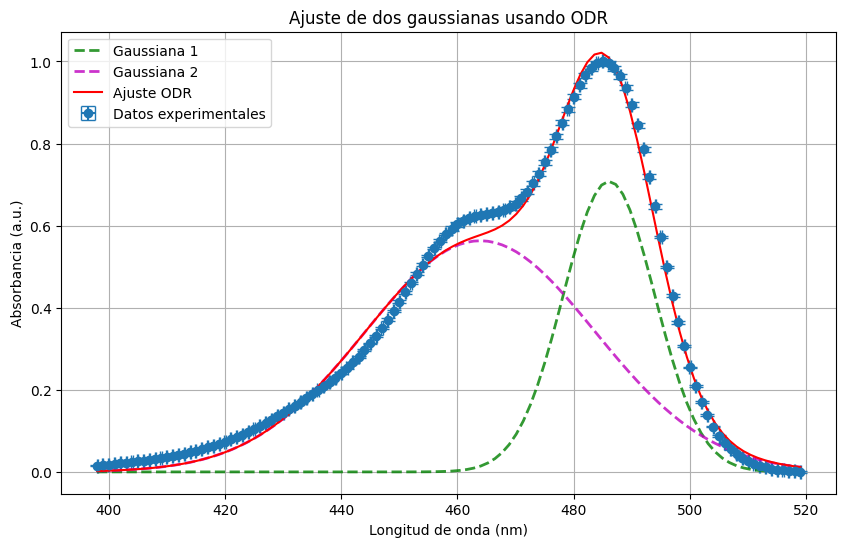


Parámetros ajustados y sus incertezas:
A1: 0.3387 ± 0.0042
mu1: 555.0794 ± 0.7215
sigma1: 23.6766 ± 0.3890
A2: 0.8375 ± 0.0111
mu2: 584.1400 ± 0.0663
sigma2: 11.9812 ± 0.1075


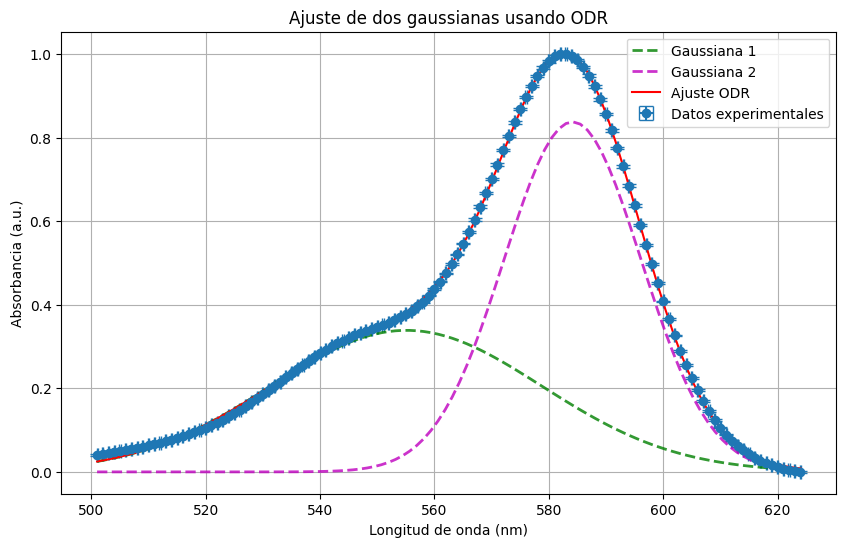


Parámetros ajustados y sus incertezas:
A1: 0.2678 ± 0.0026
mu1: 645.9602 ± 0.9028
sigma1: 32.0230 ± 0.5471
A2: 0.8921 ± 0.0079
mu2: 688.0854 ± 0.0679
sigma2: 16.1588 ± 0.1026


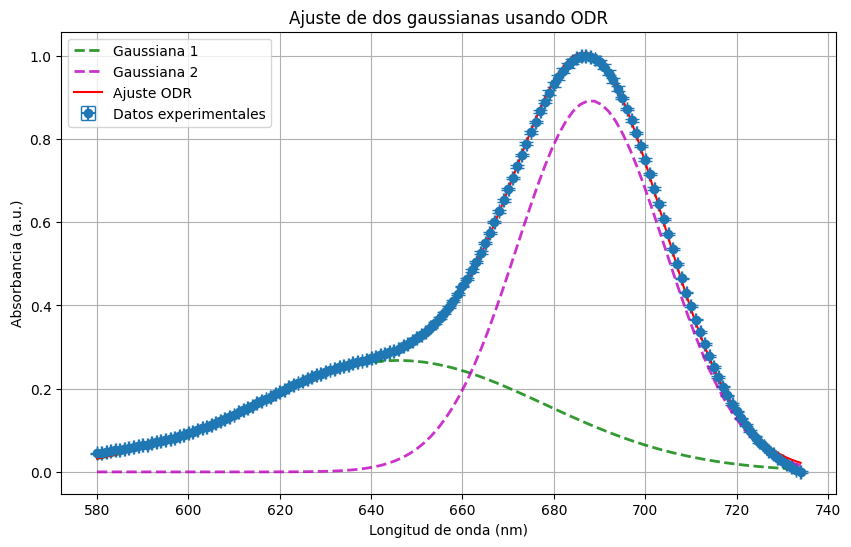

In [ ]:
(doci, err_doci) = ajustar_gaussianas('DO-CI.txt', rango_x=(281, 403), beta0=[1, 488.0, 10.0, 0.5, 460.0, 10],graficar=True)
(dods, err_dods) = ajustar_gaussianas('DO-DS.txt', rango_x=(176, 300), beta0=[0.85, 568.0, 10.0, 1.0, 580.0, 10.0], graficar=True)
(dopc, err_dopc) = ajustar_gaussianas('DO-PC.txt', rango_x=(66, 221), beta0=[0.85, 640.0, 10.0, 1.0, 690.0, 10.0], graficar=True)

doci_unc = unp.uarray(doci, err_doci)
dods_unc = unp.uarray(dods, err_dods)
dopc_unc = unp.uarray(dopc, err_dopc)

#Cociente entre los lambda y las amplitudes oxo con incertezas
coc_lambda_oxo_unc = (doci_unc[4]/doci_unc[1], dods_unc[1]/dods_unc[4], dopc_unc[1]/dopc_unc[4])
coc_A_oxo_unc = (doci_unc[3]/doci_unc[0], dods_unc[0]/dods_unc[3], dopc_unc[0]/dopc_unc[3])

lambda_doci = doci[1]
lambda_dods = dods[4]
lambda_dopc = dopc[4]
lambda2_doci = doci[4]
lambda2_dods = dods[1]
lambda2_dopc = dopc[1]

err_lambda_doci = err_doci[1]
err_lambda_dods = err_dods[4]
err_lambda_dopc = err_dopc[4]

lambda_oxo = (lambda_doci, lambda_dods, lambda_dopc)
lambda2_oxo = (lambda2_doci, lambda2_dods, lambda2_dopc)
err_lambda_oxo = (err_lambda_doci, err_lambda_dods, err_lambda_dopc)


Parámetros ajustados y sus incertezas:
A1: 0.4303 ± 0.0062
mu1: 533.0720 ± 0.8049
sigma1: 23.0046 ± 0.4499
A2: 0.7793 ± 0.0166
mu2: 559.5597 ± 0.1316
sigma2: 10.0005 ± 0.1943


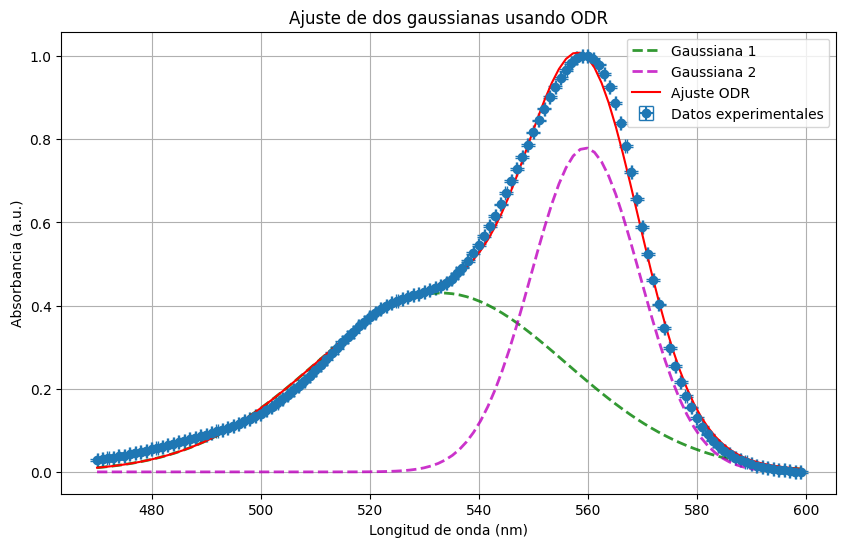


Parámetros ajustados y sus incertezas:
A1: 0.8107 ± 0.0097
mu1: 655.0747 ± 0.1720
sigma1: 14.3978 ± 0.1948
A2: 0.3258 ± 0.0052
mu2: 621.1624 ± 0.7615
sigma2: 35.6535 ± 0.3781


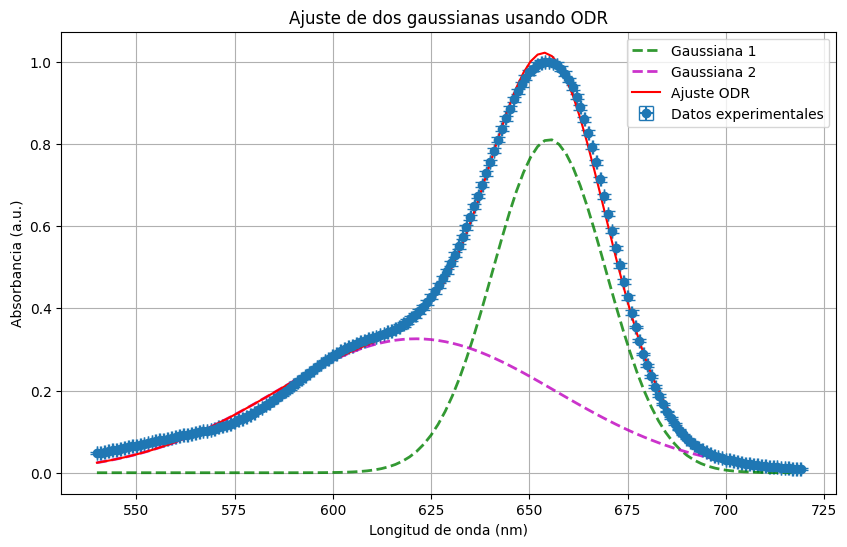


Parámetros ajustados y sus incertezas:
A1: 0.7839 ± 0.0052
mu1: 761.4888 ± 0.1261
sigma1: 19.9643 ± 0.1386
A2: 0.3446 ± 0.0025
mu2: 709.8606 ± 0.5495
sigma2: 52.4117 ± 0.3253


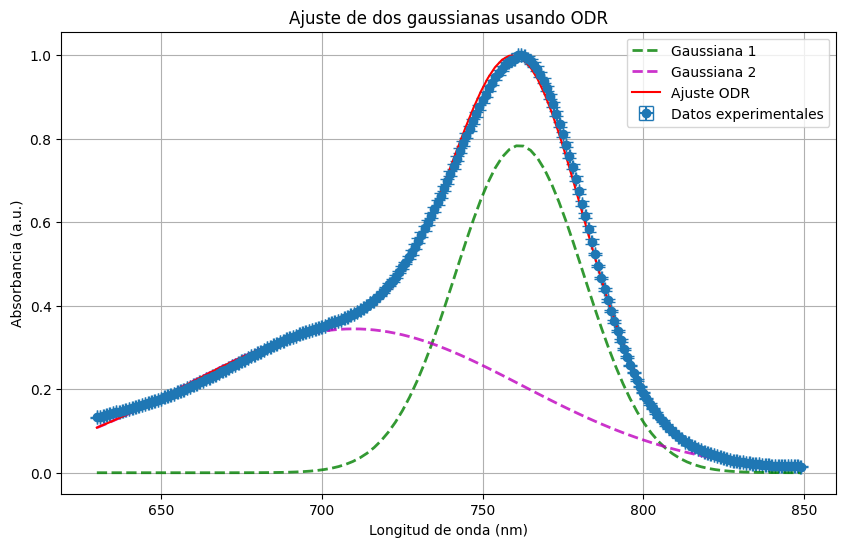

In [ ]:
(rosa, err_rosa) = ajustar_gaussianas('Rosa.txt', rango_x=(120, 250), beta0=[1.0, 500.0, 10.0, 1.0, 550.0, 10.0], graficar = True)
(celeste, err_cerleste) = ajustar_gaussianas('celeste.txt', rango_x=(190, 370), beta0=[1, 660, 40, 1, 600.0, 40], graficar = True)
(verde, err_verde) = ajustar_gaussianas('verde ok.txt', rango_x=(280, 500), beta0=[1, 760.0, 20, 0.55, 700.0, 20], graficar = True)

rosa_unc = unp.uarray(rosa, err_rosa)
celeste_unc = unp.uarray(celeste, err_cerleste)
verde_unc = unp.uarray(verde, err_verde)

#Cociente entre los lambda y las amplitudes tio con incertezas
coc_lambda_tio_unc = (rosa_unc[1]/rosa_unc[4], celeste_unc[4]/celeste_unc[1], verde_unc[4]/verde_unc[1])
coc_A_tio_unc = (rosa_unc[0]/rosa_unc[3], celeste_unc[3]/celeste_unc[0], verde_unc[3]/verde_unc[0])

lambda_rosa = rosa[4]
lambda_celeste = celeste[1]
lambda_verde = verde[1]
lambda2_rosa = rosa[1]
lambda2_celeste = celeste[4]
lambda2_verde = verde[4]

err_lambda_rosa = err_rosa[4]
err_lambda_celeste = err_cerleste[1]
err_lambda_verde = err_verde[1]

lambda_tio = (lambda_rosa, lambda_celeste, lambda_verde)
lambda2_tio = (lambda2_rosa, lambda2_celeste, lambda2_verde)
err_lambda_tio = (err_lambda_rosa, err_lambda_celeste, err_lambda_verde)

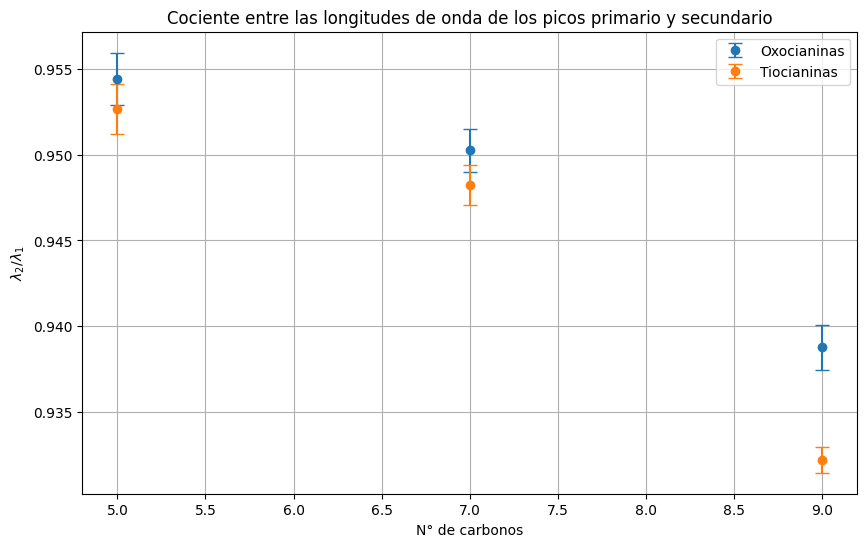

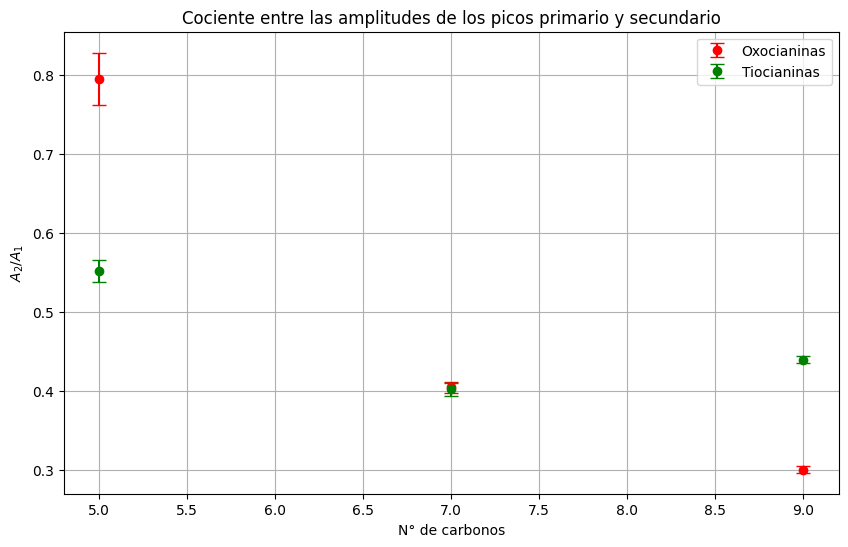

In [ ]:
#Cociente entre las longitudes de onda y amplitudes de los picos primario y secundario
y_tio = unp.nominal_values(coc_lambda_tio_unc)
y_oxo = unp.nominal_values(coc_lambda_oxo_unc)
y2_tio = unp.nominal_values(coc_A_tio_unc)
y2_oxo = unp.nominal_values(coc_A_oxo_unc)

err_y_tio = unp.std_devs(coc_lambda_tio_unc)
err_y_oxo = unp.std_devs(coc_lambda_oxo_unc)
err_y2_tio = unp.std_devs(coc_A_tio_unc)
err_y2_oxo = unp.std_devs(coc_A_oxo_unc)

x = (5,7,9)

plt.figure(figsize=(10, 6))
plt.errorbar(x, y_oxo, yerr=err_y_oxo,
                 fmt='o', capsize=5, label='Oxocianinas')
plt.errorbar(x, y_tio, yerr=err_y_tio,
                 fmt='o', capsize=5, label='Tiocianinas')
plt.xlabel('N° de carbonos')
plt.ylabel(r'$\lambda_2/ \lambda_1$')
plt.legend()
plt.title('Cociente entre las longitudes de onda de los picos primario y secundario')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.errorbar(x, y2_oxo, yerr=err_y2_oxo,
                 fmt='ro', capsize=5, label='Oxocianinas')
plt.errorbar(x, y2_tio, yerr=err_y2_tio,
                 fmt='go', capsize=5, label='Tiocianinas')
plt.xlabel('N° de carbonos')
plt.ylabel(r'$A_2/ A_1$')
plt.legend()
plt.title('Cociente entre las amplitudes de los picos primario y secundario')
plt.grid(True)

# Pozo de potencial infinito

In [ ]:
hbar = 6.582*(10**(-16)) #en eV s
h = 2*np.pi*hbar
c = 2.997*(10**8) #en m/s
mc2 = 0.511*(10**6) #en eV
m = mc2/(c**2)
d = 0.134*(10**(-9)) #en m
#La longitud del pozo es (p+2)d
#El HOMO es (p+3)/2

def salto(p):
  return 8*m*c*((p+2)*d)**2/(h*(p+4))*(10**9)

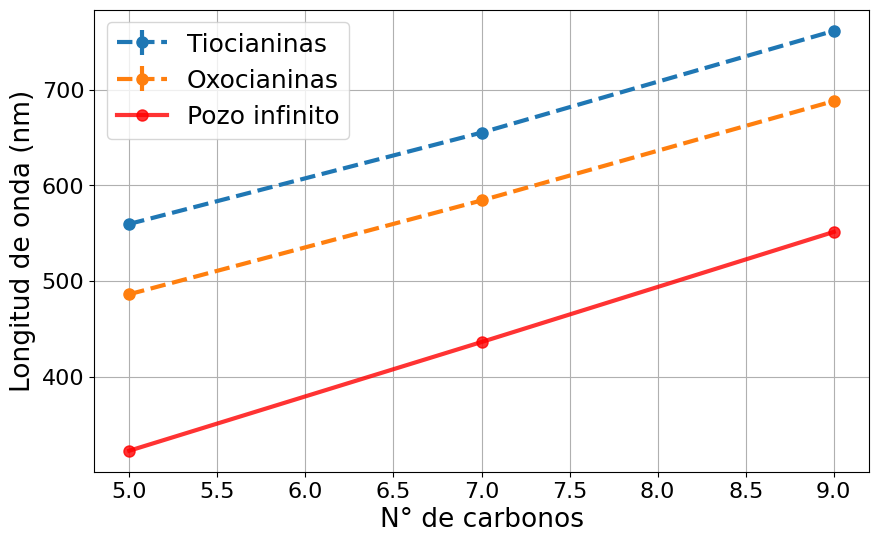

In [ ]:
x = (5, 7 ,9)

plt.figure(figsize=(10, 6))
plt.errorbar(x, lambda_tio, yerr=err_lambda_tio,
                 fmt='o--', ms=8, capsize=0, linewidth=3, label='Tiocianinas')
plt.errorbar(x, lambda_oxo, yerr=err_lambda_oxo,
                 fmt='o--', ms=8, capsize=0, linewidth=3, label='Oxocianinas')
plt.errorbar(np.linspace(5,9,3), salto(np.linspace(5,9,3)), fmt='ro-', linewidth=3, ms=8, alpha=0.8, label='Pozo infinito')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('N° de carbonos', size = 19)
plt.ylabel('Longitud de onda (nm)', size=19)
plt.legend(fontsize=18)
plt.grid(True)
plt.savefig('pozo_infinito.pdf', dpi=300)

In [ ]:
#Recién cuando terminé esto me di cuenta de que es al pedo, ya tenemos el centroide xd
(rosa, err_rosa) = ajustar_gaussianas('Rosa.txt', rango_x=(150, 250), beta0=[1.0, 500.0, 10.0, 1.0, 550.0, 10.0])
param1 = rosa[0:3]
param2 = rosa[3:6]

def derivada_gauss(x):
  A, mu, sigma = param2
  return A*(mu - x)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma**2)

raiz = optimize.root(derivada_gauss, 560)
raiz.x



Parámetros ajustados y sus incertezas:
A1: 0.4298 ± 0.0047
mu1: 531.5581 ± 0.7878
sigma1: 20.5361 ± 0.5826
A2: 0.8312 ± 0.0185
mu2: 559.7078 ± 0.0986
sigma2: 10.3032 ± 0.1504


array([559.70778192])

# Parámetro $\delta$ efectivo


Parámetros para Tiacianinas:
δ_Tia: 0.2762 ± 0.0115 nm

Parámetros para Oxocianinas:
δ_Oxo: 0.1920 ± 0.0119 nm


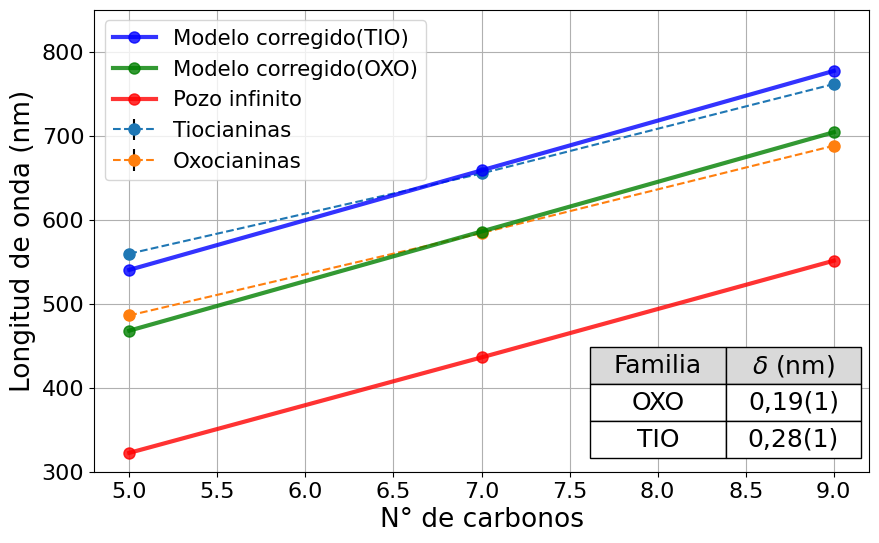

In [ ]:
def saltox(delta,p):
  return (10**9)*8*m*c*(((p+2)*d)+delta)**2/(h*(p+4))

x = (5, 7 ,9)


# Primer ajuste: Tiacianinas
data_tia = RealData(x, lambda_tio, sx=None, sy=err_lambda_tio)
model = Model(saltox)
odr_instance = ODR(data_tia, model, beta0=[10e-4])
output_tia = odr_instance.run()
params_tia = output_tia.beta
param_errors_tia = output_tia.sd_beta

print("\nParámetros para Tiacianinas:")
print(f"δ_Tia: {(10**9)*params_tia[0]:.4f} ± {(10**9)*param_errors_tia[0]:.4f} nm")

# Segundo ajuste: Oxocianinas
data_oxo = RealData(x, lambda_oxo, sx=None, sy=err_lambda_oxo)
model_oxo = Model(saltox)  # Puedes reusar el modelo
odr_instance_oxo = ODR(data_oxo, model_oxo, beta0=[10e-4])
output_oxo = odr_instance_oxo.run()
params_oxo = output_oxo.beta
param_errors_oxo = output_oxo.sd_beta

print("\nParámetros para Oxocianinas:")
print(f"δ_Oxo: {(10**9)*params_oxo[0]:.4f} ± {(10**9)*param_errors_oxo[0]:.4f} nm")

tab_text = (('OXO', '0,19(1)'), ('TIO', '0,28(1)'))
columns = ('Familia', r'$\delta$ (nm)')

plt.figure(figsize=(10, 6))
plt.errorbar(x, lambda_tio, yerr=err_lambda_tio,
                 fmt='o--', ms=8, capsize=0, ecolor='black', label='Tiocianinas')
plt.errorbar(x, lambda_oxo, yerr=err_lambda_oxo,
                 fmt='o--', ms=8, capsize=0, ecolor='black', label='Oxocianinas')
plt.plot(np.linspace(5,9,3), saltox(params_tia[0],np.linspace(5,9,3)), 'bo-', linewidth=3, zorder=3, ms=8, alpha=0.8, label='Modelo corregido(TIO)')
plt.plot(np.linspace(5,9,3), saltox(params_oxo[0],np.linspace(5,9,3)), 'go-', linewidth=3, zorder=3, ms=8, alpha=0.8, label='Modelo corregido(OXO)')
plt.plot(np.linspace(5,9,3), salto(np.linspace(5,9,3)), 'ro-', linewidth=3, ms=8, alpha=0.8, label='Pozo infinito')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('N° de carbonos', size = 19)
plt.ylabel('Longitud de onda (nm)', size=19)
plt.legend(fontsize=15.3)
plt.grid(True)
#plt.text(7.5, 390, r'$\delta_{TIO}$ = 0,28(1) nm', fontsize=22, color='blue')
#plt.text(7.5, 340, r'$\delta_{OXO}$ = 0,19(1) nm', fontsize=22, color='green')
tab=plt.table(cellText=tab_text, colLabels=columns, bbox=[0.64, 0.03, 0.35, 0.24], colColours=('0.85', '0.85'), cellLoc='center', zorder=4)
tab.auto_set_font_size(False)
tab.set_fontsize(18)
plt.ylim(300, 850)
plt.savefig('pozo_con_delta.pdf', dpi=300)

# Pozo de potencial finito

In [ ]:
#Ecuaciones que definen los niveles de energía de las soluciones pares e impares del pozo finito

def negative_to_nan(v):
  if isinstance(v, float):
    return np.nan if v < 0 else v
  else:
    arr = v.copy()
    arr[arr < 0] = np.nan
    return arr

def even_sol(x,theta0):
    y1=negative_to_nan(tan(x))
    y=sqrt((theta0/x)**2-1)
    return (y-y1)
def odd_sol(x,theta0):
    y2=negative_to_nan(-1/tan(x))
    y=sqrt((theta0/x)**2-1)
    return (y-y2)

In [ ]:
#Encontrar las intersecciones

def sqWellSol1(theta0,step):

    esol=array([],dtype=float) #array to store even solutions
    osol=array([],dtype=float)  #array to store odd solutions
    inc=arange(step,theta0,step) #array of "x"s to find solutions

    even=True #We know even and odd solutions alternate starting with the evens so switch even
                #flag to False after an even solution is found so routine knows to next search
                #for odd solutions, then repeat.

    for i in range(len(inc)-1):
        if even==True:
            if even_sol(inc[i],theta0)*even_sol(inc[i+1],theta0)<0: #have we bracketed a zero?

                #yes? then find it. Important! optimize.brentq expects the function it is finding
                #the zero of to only take "x" values, anything else, like theta0 gets sent in
                #as args.

                esol=append(esol,optimize.brentq(even_sol,inc[i],inc[i+1],args=theta0) )
                even=False
        if even==False:
            if odd_sol(inc[i],theta0)*odd_sol(inc[i+1],theta0)<0:


                osol=append(osol,optimize.brentq(odd_sol,inc[i],inc[i+1],args=theta0))

                even=True


    return esol,osol

def sqWellSol(V_0, p, step):
    theta0 = np.sqrt(2*m*V_0)*(d*(p+2))/(2*hbar)
    sols = np.concatenate((sqWellSol1(theta0,step)[0], sqWellSol1(theta0,step)[1]))
    return np.sort(sols)

/tmp/ipython-input-1704435220.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((m * V_0 * (d * (p + 2))**2) / (2 * hb**2) - v**2)


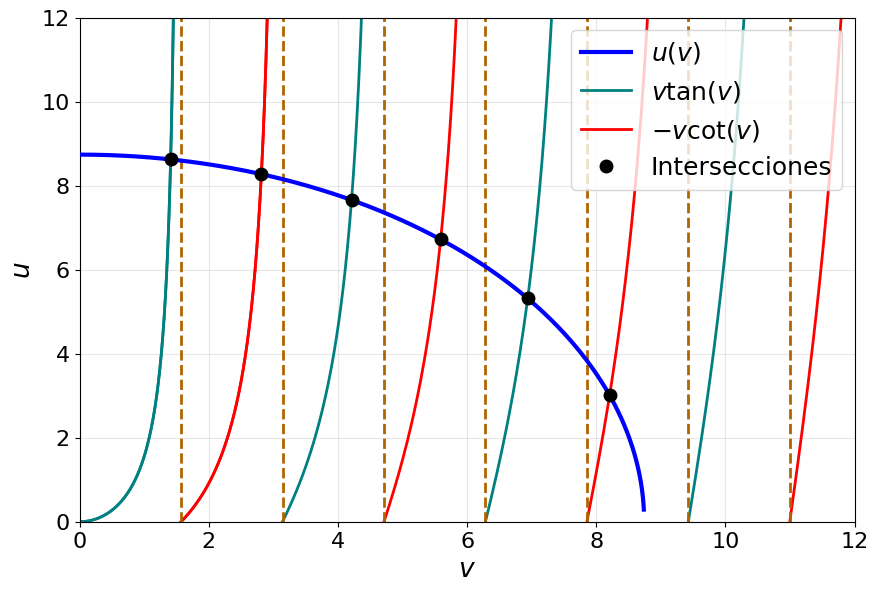

In [ ]:
from matplotlib.widgets import Slider, Button

#m = 9.109 * 10**(-31)  # masa del electrón (kg)
#d = 0.14 * 10**(-9)    # distancia carbono-carbono (m)
#h = 1.054 * 10**(-34)  # cte de Planck reducida (J*s)
hb=h/(2*np.pi)
eV_to_J = 1.60217662 * 10**(-19)  # 1 eV en joules
J_to_eV = 1 / eV_to_J  # Factor de conversión J → eV

V_0_init_eV = 8.0  # Valor inicial en eV
p_init = 7
v = np.linspace(0, 50, 10000)

# Convertir valores límites a eV para el slider
V_0_min_eV = 5.0  # 8.0109e-19 * J_to_eV ≈ 5.0 eV
V_0_max_eV = 15.0  # 2.4033e-18 * J_to_eV ≈ 15.0 eV

def f(V_0, p, v): #En notación de Paula esto es u
    # Convertir V_0 de eV a Joules para los cálculos
    #V_0_J = V_0 * eV_to_J
    return np.sqrt((m * V_0 * (d * (p + 2))**2) / (2 * hb**2) - v**2)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.25)  # Espacio para los sliders

#Definir nuevo rango para que el grafico de v tan(v) y -v cotan(v) no quede raro

def intv_tan(n):
  return np.linspace(n*np.pi, (n+1/2)*np.pi - 10**(-3), 10000)

def intv_cotan(n):
  return intv_tan(n) + np.pi/2

def theta(V_0, p):
  return np.sqrt(2*m*V_0)*(d*(p+2))/(2*hbar)

(ceros_tan, ceros_cotan) = sqWellSol1(theta(V_0_init_eV, p_init), 10**(-2))

u_line, = ax.plot(v, f(V_0_init_eV, p_init, v), 'b-', linewidth=3, zorder = 3, label='$u(v)$')
pares_line, = ax.plot(intv_tan(0), intv_tan(0) * np.tan(intv_tan(0)), '-', color='teal', linewidth=2, label='$v\\tan(v)$')
impares_line, = ax.plot(intv_cotan(0), -intv_cotan(0) * (1/np.tan(intv_cotan(0))), 'r-', linewidth=2, label='$-v\\cot(v)$') #Acá pongo las labels para que no se repitan en el for
intersec_tan = plt.errorbar(ceros_tan, ceros_tan*np.tan(ceros_tan), fmt='o', color='black', ms=9, zorder=4)
intersec_cotan = plt.errorbar(ceros_cotan, -ceros_cotan*(1/np.tan(ceros_cotan)), fmt='o', color='black', ms=9, zorder=4, label='Intersecciones')

rango_pi = []

for i in range(10):
  pares_line, = ax.plot(intv_tan(i), intv_tan(i) * np.tan(intv_tan(i)), color='teal', linewidth=2)
  impares_line, = ax.plot(intv_cotan(i), -intv_cotan(i) * (1/np.tan(intv_cotan(i))), 'r-', linewidth=2)
  rango_pi.append((i+1)*np.pi/2)

plt.vlines(rango_pi, 0, 12, colors='#B06500', linestyles='dashed', linewidth=2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.set_xlabel(r"$v$", fontsize=19)
ax.set_ylabel(r"$u$", fontsize=19)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=18, loc='upper right')
plt.savefig('intersecciones.pdf', dpi=300)
#ax.set_title(f'$V_0$ = {V_0_init_eV:.2f} eV, $p$ = {p_init}')

# Crear sliders
#ax_V0 = plt.axes([0.25, 0.1, 0.65, 0.03])
#ax_p = plt.axes([0.25, 0.05, 0.65, 0.03])

#slider_V0 = Slider(
    #ax=ax_V0,
    #label='$V_0$ (eV)',
    #valmin=V_0_min_eV,
    #valmax=V_0_max_eV,
    #valinit=V_0_init_eV,
    #valfmt='%.2f'
#)

#slider_p = Slider(
  #  ax=ax_p,
#    label='$p$',
 #   valmin=5,
  #  valmax=9,
   # valinit=p_init,
    #valstep=1
#)

# Función de actualización
#def update(val):
 #   V_0_eV = slider_V0.val  # Valor en eV
  #  p = slider_p.val

    # Actualizar la función u(v) - la función f convierte internamente a Joules
   # u_new = f(V_0_eV, p, v)
    #u_line.set_ydata(u_new)

    # Actualizar título con valor en eV
    #ax.set_title(f'$V_0$ = {V_0_eV:.2f} eV, $p$ = {p}')

    # Forzar redibujado
    #fig.canvas.draw_idle()

# Conectar sliders a la función de actualización
#slider_V0.on_changed(update)
#slider_p.on_changed(update)

# Botón de reset
#resetax = plt.axes([0.8, 0.025, 0.1, 0.04])

#def reset(event):
 #   slider_V0.reset()
  #  slider_p.reset()

#button = Button(resetax, 'Reset', hovercolor='0.975')
#button.on_clicked(reset)

#plt.show()

In [ ]:
#Calcular el lambda de la transición HOMO-LUMO

def lambda_holu(V_0, p, step=10**(-2)):
    energias = 2*((hbar*sqWellSol(V_0, p, step))**2)/(m*(d*(p+2))**2)
    N = int((p+3)/2)
    homo = energias[N-1]
    lumo = energias[N]
    return (10**9)*2*np.pi*hbar*c/(lumo - homo)

In [ ]:
# Calcular el lambda de la transición (HOMO-1)-LUMO
def lambda_ho1lu(V_0, p, step=10**(-2)):
    energias = 2*((hbar*sqWellSol(V_0, p, step))**2)/(m*(d*(p+2))**2)
    N = int((p+3)/2)
    homo1 = energias[N-2]
    lumo = energias[N]
    return (10**9)*2*np.pi*hbar*c/(lumo - homo1)

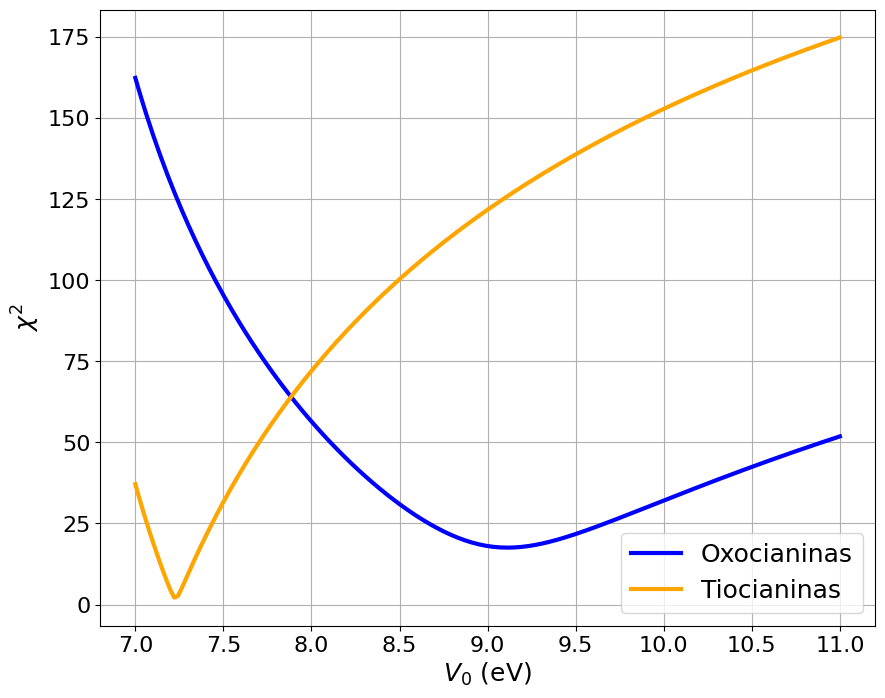

In [ ]:
# Graficar chi^2 en función de V_0

x = (5,7,9)

def dif_oxo(V_0):
    y = 0
    for i in (0, 1, 2):
        y = y + (lambda_oxo[i] - lambda_holu(V_0, x[i]))**2
    return sqrt(y)

def dif_tio(V_0):
    y = 0
    for i in (0, 1, 2):
        y = y + (lambda_tio[i] - lambda_holu(V_0, x[i]))**2
    return sqrt(y)


chi_oxo = []

for v in linspace(7, 11, 200):
    chi_oxo.append(dif_oxo(v))

chi_tio = []

for v in linspace(7, 11, 200):
    chi_tio.append(dif_tio(v))

plt.figure(figsize=(10,8))
plt.errorbar(np.linspace(7, 11, 200), chi_oxo, fmt='b-', linewidth=3, label='Oxocianinas')
plt.errorbar(np.linspace(7, 11, 200), chi_tio, fmt='-', linewidth=3, color='orange', label='Tiocianinas')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$V_0$ (eV)', size=18)
plt.ylabel(r'$\chi^2$', size=18)
#plt.title(r'Suma de los Residuos Cuadrados en función de V_0')
plt.legend(fontsize=18)
plt.grid(True)
plt.savefig('chi_cuadrado.pdf', dpi=300)

In [ ]:
#Minimizar el chi^2 numéricamente

def minimizador(func, intervalo, n, cifras):
  arr=np.linspace(intervalo[0], intervalo[1], n)
  step = (intervalo[1] - intervalo[0])/n
  arr_izq = []
  arr_der = []
  for x in arr:
    if func(x - step) > func(x) > func(x + step):
      arr_izq.append(x)
    elif func(x - step) < func(x) < func(x + step):
      arr_der.append(x)
  V_inf = np.max(arr_izq)
  V_sup = np.min(arr_der)
  V = (V_inf + V_sup)/2

  if func(V_inf) - func(V) < 10**(-cifras) and func(V_sup) - func(V) < 10**(-cifras):
    return unc.ufloat(V, (V_sup - V_inf)/2)
  else:
    return minimizador(func, [V_inf, V_sup], n, cifras)

min_oxo = minimizador(dif_oxo, [9, 9.3], 200, 4)
min_tio = minimizador(dif_tio, [7.1, 7.4], 200, 4)
print(min_oxo)
print(min_tio)

9.1131+/-0.0015
7.228315+/-0.000015


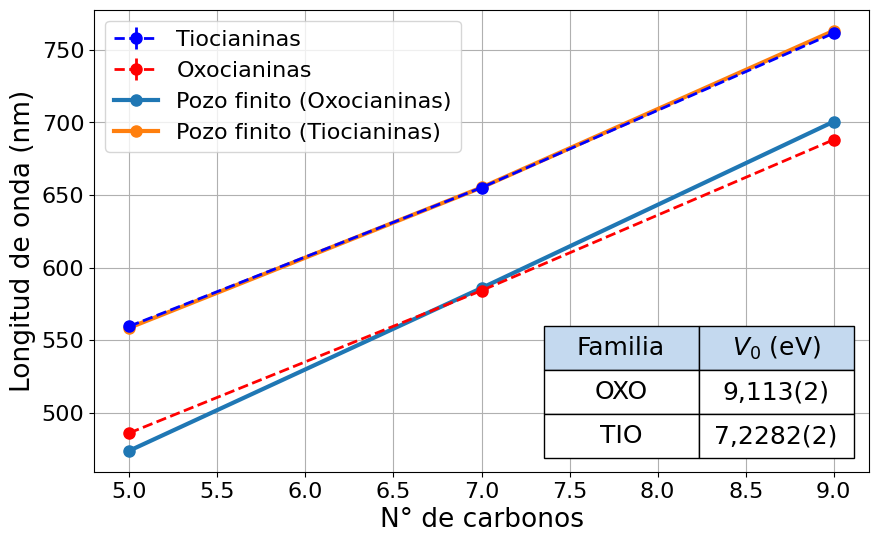

In [ ]:
V_oxo = unp.nominal_values(min_oxo)
err_V_oxo = unp.std_devs(min_oxo)
V_tio = unp.nominal_values(min_tio)
err_V_tio = unp.std_devs(min_tio)

x = (5,7,9)

pozo_finito_oxo=[lambda_holu(V_oxo, 5), lambda_holu(V_oxo, 7), lambda_holu(V_oxo, 9)]
pozo_finito_tio=[lambda_holu(V_tio, 5), lambda_holu(V_tio, 7), lambda_holu(V_tio, 9)]

tab_text = (('OXO', '9,113(2)'), ('TIO', '7,2282(2)'))
columns = ('Familia', r'$V_0$ (eV)')

plt.figure(figsize=(10, 6))
plt.errorbar(x, lambda_tio, yerr=err_lambda_tio, fmt='bo--', ms=8, linewidth=2, zorder=3, label='Tiocianinas')
plt.errorbar(x, lambda_oxo, yerr=err_lambda_oxo, fmt='ro--', ms=8, linewidth=2, zorder=3, label='Oxocianinas')
plt.errorbar(x, pozo_finito_oxo, fmt='o-', ms=8, linewidth=3, label='Pozo finito (Oxocianinas)')
plt.errorbar(x, pozo_finito_tio, fmt='o-', ms=8, linewidth=3, label='Pozo finito (Tiocianinas)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('N° de carbonos', size = 19)
plt.ylabel('Longitud de onda (nm)', size = 19)
plt.legend(fontsize=16)
#plt.text(7.1, 510, r'$V_{OXO}$ = 9,113(2) eV', size=23, color='teal')
#plt.text(7.1, 480, r'$V_{TIO}$ = 7,2282(2) eV', size=23, color='#F17D08')
tab=plt.table(cellText=tab_text, colLabels=columns, bbox=[0.58, 0.03, 0.4, 0.285], colColours=('#c4d9ef', '#c4d9ef'), cellLoc='center', zorder=4)
tab.auto_set_font_size(False)
tab.set_fontsize(18)
plt.grid(True)
plt.savefig('pozo_finito.pdf', dpi=300)

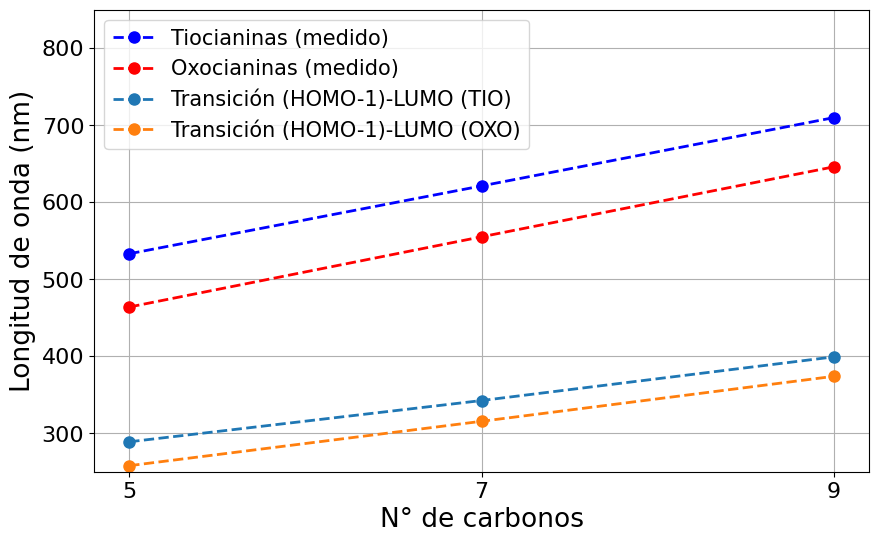

In [ ]:
#Comparación de los lambda de la transición (HOMO-1)-LUMO y del segundo pico

lambda_modelo_oxo = (lambda_ho1lu(V_oxo, 5), lambda_ho1lu(V_oxo, 7), lambda_ho1lu(V_oxo, 9))
lambda_modelo_tio = (lambda_ho1lu(V_tio, 5), lambda_ho1lu(V_tio, 7), lambda_ho1lu(V_tio, 9))

x=(5,7,9)
plt.figure(figsize=(10, 6))
plt.errorbar(x, lambda2_tio, fmt='bo--', ms=8, linewidth=2, zorder=3, label='Tiocianinas (medido)')
plt.errorbar(x, lambda2_oxo, fmt='ro--', ms=8, linewidth=2, zorder=3, label='Oxocianinas (medido)')
plt.errorbar(x, lambda_modelo_tio, fmt='o--', ms=8, linewidth=2, label='Transición (HOMO-1)-LUMO (TIO)')
plt.errorbar(x, lambda_modelo_oxo, fmt='o--', ms=8, linewidth=2, label='Transición (HOMO-1)-LUMO (OXO)')
plt.xticks((5,7,9),(5,7,9),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('N° de carbonos', size = 19)
plt.ylabel('Longitud de onda (nm)', size = 19)
plt.ylim(250, 850)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig('homo-1.pdf', dpi=300)